## Low-rank Matrix Completion via Riemannian Optimization -- Numerical Experiments

For this problem we implement the three approaches for low-rank matrix completion described in problems 1-3 of Homework 3.

Please fill in the gaps in the code blocks below. 

</span>$\color{red}{\text{Please write your own code.}}$



### Setting up

You may find it helpful to utilize the [Manopt toolbox](https://pymanopt.org/).
* Familiarize yourself with the available manifold classes in the API reference.
* Familiarize yourself with the avialable optimizers in the API reference.

In [ ]:
# Install required packages.
!pip install pymanopt

In [3]:
import numpy as np

### (a) Implement manifold descriptors and related geometric tools.


In [263]:
import autograd.numpy as anp
import pymanopt
import pymanopt.manifolds
import matplotlib.pyplot as plt

anp.random.seed(7)

# Parameters
m = 200 # matrix has size m x n
n = 500 
r = 5 # matrix has rank r
         
matrix = np.random.default_rng().normal(0, 1, (m, n))

In [269]:
# Manifold 1: Product of linear spaces

point = manifold1.random_point()
tangent_vector_a = manifold1.random_tangent_vector(point)
tangent_vector_b = manifold1.random_tangent_vector(point)

manifold1 = pymanopt.manifolds.product.Product([pymanopt.manifolds.euclidean.Euclidean(m, r),
                                           pymanopt.manifolds.euclidean.Euclidean(n, r)])

print(f"Inner Product: {manifold1.inner_product(point, tangent_vector_a, tangent_vector_b)}")
print(f"Norm: {manifold1.norm(point, tangent_vector_a)}")
print(f"Retraction: {manifold1.retraction(point, tangent_vector_a)}")

Inner Product: 0.020861640973457187
Norm: 0.9999999999999999
Retraction: [array([[-4.37769477e-01,  5.22423558e-01,  3.42048398e-01,
         1.07354849e+00, -6.48279385e-01],
       [ 6.51018384e-01, -1.12716406e+00, -5.60818228e-02,
        -1.79751274e+00, -1.30305154e-01],
       [-3.05914812e-01, -8.11301132e-01, -8.29538567e-01,
        -2.95757870e-01,  1.00346984e+00],
       [-2.51666614e-01, -7.76148324e-02,  2.84088586e-01,
         1.27690821e+00,  1.00162416e+00],
       [ 4.25095945e-01, -1.77158938e+00,  5.31550186e-01,
        -7.05685911e-01,  3.91425912e-01],
       [-8.28779683e-01,  4.87968063e-01, -4.72494186e-01,
        -5.20594153e-01,  1.62910832e-01],
       [-1.48765702e+00,  1.08722297e+00, -1.33990425e-01,
        -1.74956331e-01, -9.94423992e-01],
       [ 5.75384897e-01, -1.11603985e+00,  1.03638931e+00,
        -8.87915850e-01,  6.87636112e-03],
       [-8.11643578e-01, -3.21699690e-02,  7.47591804e-01,
        -6.94465653e-01, -1.22435549e+00],
       [

In [270]:
# Manifold 2: Product of Stiefel manifold and linear space

point = manifold2.random_point()
tangent_vector_a = manifold2.random_tangent_vector(point)
tangent_vector_b = manifold2.random_tangent_vector(point)

manifold2 = pymanopt.manifolds.product.Product([pymanopt.manifolds.stiefel.Stiefel(m, r),
                                           pymanopt.manifolds.euclidean.Euclidean(n, r)])
                                           

print(f"Inner Product: {manifold2.inner_product(point, tangent_vector_a, tangent_vector_b)}")
print(f"Norm: {manifold2.norm(point, tangent_vector_a)}")
print(f"Retraction: {manifold2.retraction(point, tangent_vector_a)}")

Inner Product: 0.020861640973457187
Norm: 0.9999999999999999
Retraction: [array([[-2.83964448e-02,  3.78275953e-02,  2.46859900e-02,
         7.46051958e-02, -4.29751310e-02],
       [ 4.22290922e-02, -8.04334133e-02,  1.02436475e-03,
        -1.19496548e-01, -2.10487526e-02],
       [-1.98435330e-02, -5.47741344e-02, -6.17269488e-02,
        -1.81973442e-02,  7.09019165e-02],
       [-1.63246583e-02, -4.34428205e-03,  2.30497737e-02,
         9.44626936e-02,  7.47821689e-02],
       [ 2.75743609e-02, -1.24009856e-01,  5.10504900e-02,
        -3.12643437e-02,  1.30504957e-02],
       [-5.37597932e-02,  3.70239775e-02, -3.97445993e-02,
        -4.42670301e-02,  1.72162736e-02],
       [-9.64986659e-02,  8.10460436e-02, -1.56566868e-02,
        -2.26645314e-02, -6.36221491e-02],
       [ 3.73230349e-02, -7.93608365e-02,  8.78106826e-02,
        -4.77726850e-02, -1.28043862e-02],
       [-5.26482391e-02,  1.04841497e-03,  5.98359217e-02,
        -4.48430354e-02, -9.29738447e-02],
       [

In [271]:
# Manifold 3: Manifold of fixed-rank matrices

point = manifold3.random_point()
tangent_vector_a = manifold3.random_tangent_vector(point)
tangent_vector_b = manifold3.random_tangent_vector(point)

manifold3 = pymanopt.manifolds.fixed_rank.FixedRankEmbedded(m, n, r)


print(f"Inner Product: {manifold3.inner_product(point, tangent_vector_a, tangent_vector_b)}")
print(f"Norm: {manifold3.norm(point, tangent_vector_a)}")
print(f"Retraction: {manifold3.retraction(point, tangent_vector_a)}")

Inner Product: -0.04321326839792799
Norm: 1.0
Retraction: _FixedRankPoint(u=array([[-1.47598132e-01,  2.38362695e-03,  1.66483731e-02,
         9.11638086e-02, -1.17084852e-01],
       [-6.84204245e-02, -8.66773394e-02,  1.35094538e-01,
         1.57031862e-02, -5.57538427e-03],
       [ 6.46992665e-02,  6.68096764e-02, -3.61795118e-02,
         2.62494263e-02,  1.37031946e-02],
       [-5.40426320e-02, -7.84379081e-02, -3.13083390e-02,
        -8.66310099e-03, -1.34743917e-02],
       [-1.34076510e-01,  2.44217056e-02, -2.49088181e-03,
        -9.27071387e-02,  6.59150267e-02],
       [ 9.26075652e-03, -4.48069757e-02, -1.15475067e-01,
        -2.08766486e-02, -6.66011055e-02],
       [ 4.82934580e-02,  4.01202715e-02,  1.72916043e-02,
        -1.17780194e-01, -9.28666515e-02],
       [ 2.94700772e-02, -1.16522135e-02, -7.32299177e-02,
         1.69183824e-03,  1.28480403e-03],
       [-3.75915940e-02,  8.43144551e-02, -5.34830383e-02,
        -5.12590014e-03, -1.07386383e-02],
      

### (b) Generate test data

See homework set for specific instructions.

In [175]:
def rand_mat(rows, columns):
    return anp.random.default_rng().normal(0, 1, (rows, columns))
    
def gen_mat(m, n, r):
    m1 = rand_mat(m, r)
    m2 = rand_mat(n, r)
    mat = m1 @ m2.T
    
    return mat

def censor(m, n, k):
    observed = anp.unique(anp.random.default_rng().integers(1, m*n+1, k))
    data = anp.zeros(n*m)
    data[observed] = 1
    data = anp.reshape(data, (m, n))
    
    return data

def gen_test_data(m, n, r, k):
    rand_mat = gen_mat(m, n, r) 
    B = censor(m, n, k)
    
    return anp.multiply(rand_mat, B), rand_mat, B

k = 100

M_tilde, M, B = gen_test_data(m, n, r, k)
# gen_mat(3, 3, 2)

### (c) Use Riemannian Gradient Descent (with line search) to compute low-rank matrix completion with the three different approaches.

You may use the Manopt implementation of RGD or implement the algorithm yourself as an exercise.

In [231]:
import pymanopt.optimizers
from pymanopt.tools.diagnostics import check_gradient

times = {'Manifold 1': None, 'Manifold 2': None, 'Manifold 3': None}
costs = {'Manifold 1': None, 'Manifold 2': None, 'Manifold 3': None}

In [232]:
# Approach 1

# matrix = anp.random.default_rng().normal(0, 1, (m, n))

@pymanopt.function.autograd(manifold1)
def cost1(X, Y):
    X = X @ Y.T
    return 1/2 * anp.linalg.norm(anp.multiply(X-M_tilde, B), ord='fro')**2

@pymanopt.function.autograd(manifold1)
def euclidean_gradient1(X,Y):
    X = X @ Y.T
    return (X-M_tilde) @ B

problem1 = pymanopt.Problem(manifold1, cost1)


optimizer = pymanopt.optimizers.SteepestDescent(log_verbosity = 1)
# check_gradient(problem1)
result = optimizer.run(problem1)

times['Manifold 1'] = result.log['iterations']['time']
costs['Manifold 1'] = result.log['iterations']['cost']

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +6.1166080354605378e+02    1.24146571e+02    
   2         +4.9613218829180704e+02    1.07434398e+02    
   3         +1.7100586726129626e+02    5.04178282e+01    
   4         +6.1960030204801669e+01    5.64119676e+01    
   5         +4.7355690527124231e+01    3.37925769e+01    
   6         +8.6689388455379763e+00    1.51332432e+01    
   7         +5.0867964005253619e+00    1.49318160e+01    
   8         +2.9008879220934678e+00    1.05670115e+01    
   9         +2.6077112788292767e+00    1.09432268e+01    
  10         +1.5857938758021259e+00    8.13675811e+00    
  11         +8.0598815035562998e-01    5.57262676e+00    
  12         +3.0171754274970547e-01    2.45679014e+00    
  13         +1.7463238079000523e-01    9.71014996e-01    
  14         +1.5683260241182431e-01    2.65192137e+00    
  15         +9.5365259742343458e-02    1.

In [233]:
# Approach 2

@pymanopt.function.autograd(manifold2)
def cost2(X, Y):
    X = X @ Y.T
    return 1/2 * anp.linalg.norm(anp.multiply(X-M_tilde, B), ord='fro') ** 2

problem2 = pymanopt.Problem(manifold2, cost2)

optimizer = pymanopt.optimizers.SteepestDescent(log_verbosity = 1)
result = optimizer.run(problem2)

times['Manifold 2'] = result.log['iterations']['time']
costs['Manifold 2'] = result.log['iterations']['cost']

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +3.8152967994270239e+02    5.77283472e+01    
   2         +3.3229033789309767e+02    4.71161419e+01    
   3         +2.6814704520692311e+02    1.90698427e+01    
   4         +2.3797828036945018e+02    8.07945685e+01    
   5         +1.7143657751872550e+02    2.84068874e+01    
   6         +1.6046718797440869e+02    2.90306562e+01    
   7         +1.5624244242057725e+02    1.50332151e+01    
   8         +1.5487651549090941e+02    1.59673321e+01    
   9         +1.5416944643405418e+02    2.12352705e+01    
  10         +1.5222524101092137e+02    9.96445210e+00    
  11         +1.5084321400424326e+02    2.05497904e+01    
  12         +1.4894658619911866e+02    1.31954464e+01    
  13         +1.4820895498273228e+02    1.84981729e+01    
  14         +1.4651904574454704e+02    8.11817602e+00    
  15         +1.4048404311544931e+02    1.

In [234]:
# Approach 3

@pymanopt.function.autograd(manifold3)
def cost3(U, M, V):
    X = U @ anp.diag(M) @ V
    return 1/2 * anp.linalg.norm(anp.multiply(X-M_tilde, B), ord='fro') ** 2

problem3 = pymanopt.Problem(manifold3, cost3)

optimizer = pymanopt.optimizers.SteepestDescent(log_verbosity = 1)
result = optimizer.run(problem3)

times['Manifold 3'] = result.log['iterations']['time']
costs['Manifold 3'] = result.log['iterations']['cost']

Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +3.8603273927935965e+02    5.17830549e+00    
   2         +3.8138947364914094e+02    1.12012349e+01    
   3         +3.6171420961637619e+02    1.55630053e+01    
   4         +2.8914732918608610e+02    1.39223476e+01    
   5         +1.6222009403746867e+02    7.28329855e+00    
   6         +1.2487190802448144e+02    7.48474550e+00    
   7         +8.7456704734479970e+01    3.41968659e+00    
   8         +7.7605800347236269e+01    6.97022474e+00    
   9         +4.9790330424472010e+01    2.96138638e+00    
  10         +4.9254396231041710e+01    4.74937626e+00    
  11         +4.7199044805558771e+01    4.35986085e+00    
  12         +4.0479660448477276e+01    2.82707829e+00    
  13         +3.4715088935621417e+01    1.84258348e+00    
  14         +3.0908989570220289e+01    2.70890481e+00    
  15         +2.6546507689234865e+01    2.

### Plot your results for different parameter choices.

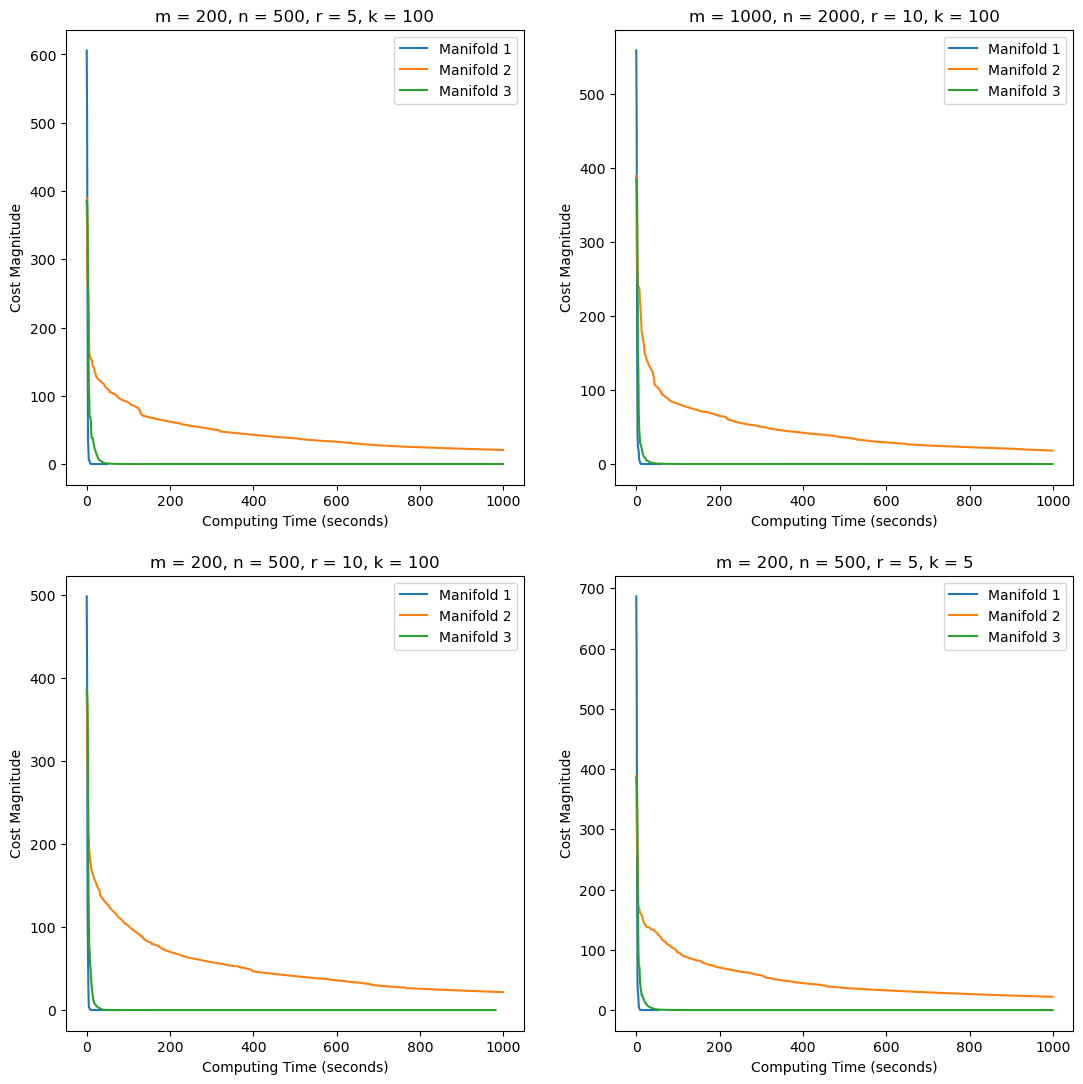

In [290]:
from pymanopt.tools.multi import multiqr


In [295]:
(U @ np.diag(M) @ V)[0,0]

0.0024254036627161645

In [293]:
(Q @ R)[0,0]

0.0024254036627161645

### (d) Compare your results for the three different approaches.

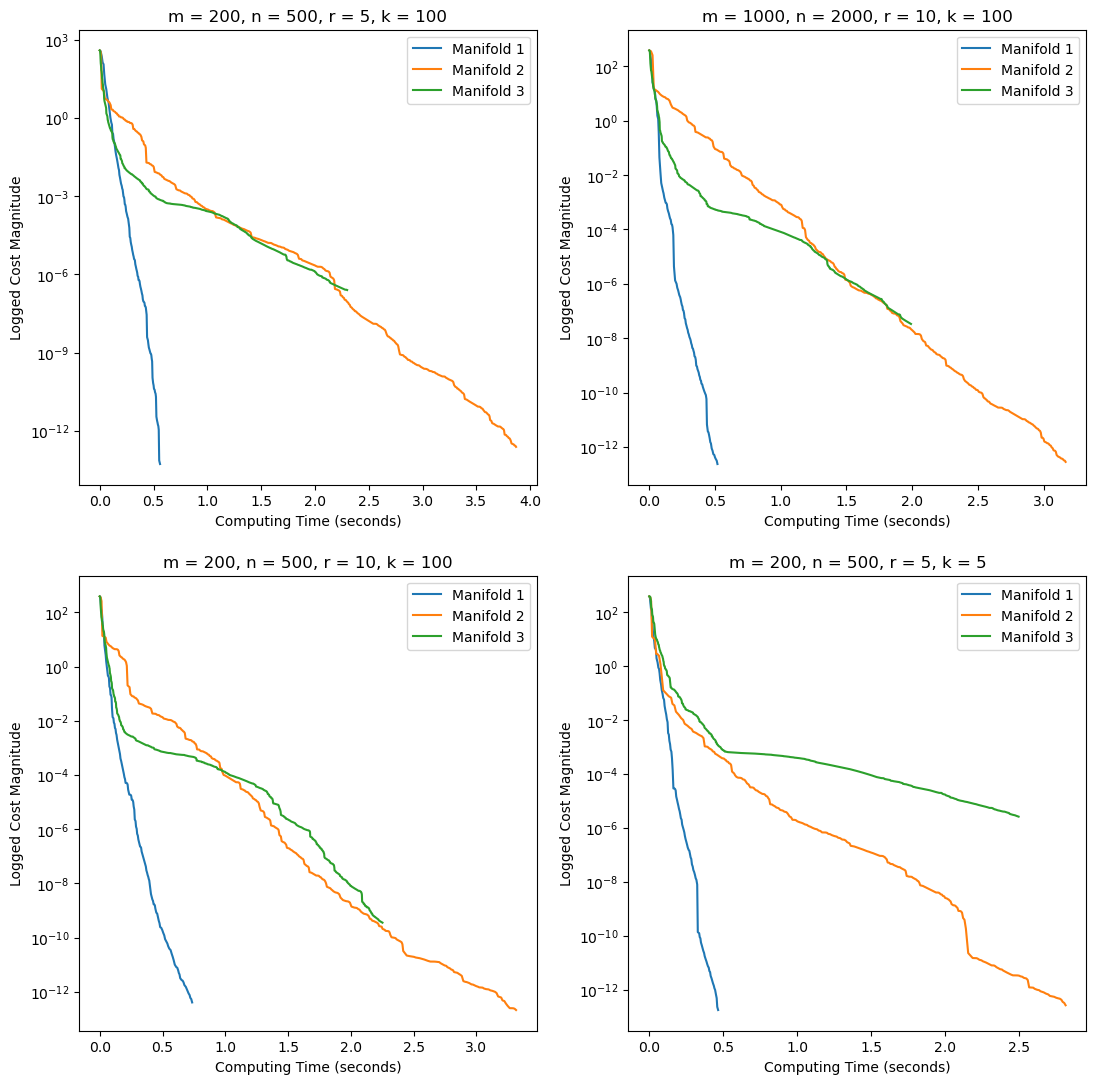

In [301]:

fig, axes = plt.subplots(2, 2, figsize = (13, 13))

def gen_choices(m, n, r, k, ax):
    M_tilde, M, B = gen_test_data(m, n, r, k)
    
    U, M, V = manifold3.random_point()
    Q, R = multiqr(U @ np.diag(M) @ V)
    
    times = {'Manifold 1': None, 'Manifold 2': None, 'Manifold 3': None}
    costs = {'Manifold 1': None, 'Manifold 2': None, 'Manifold 3': None}
    
    problem1 = pymanopt.Problem(manifold1, cost1)
    problem2 = pymanopt.Problem(manifold2, cost2)
    problem3 = pymanopt.Problem(manifold3, cost3)
    
    problems = [problem1, problem2, problem3] 
    initial_points = [[Q,R.T], [Q,R.T], [U,M,V]]
    
    for i in range(len(problems)): 
        optimizer = pymanopt.optimizers.SteepestDescent(verbosity = 0, log_verbosity = 1)
        result = optimizer.run(problems[i],  initial_point = initial_points[i])
        times[list(times.keys())[i]] = result.log['iterations']['time']
        costs[list(costs.keys())[i]] = result.log['iterations']['cost']
    
    # return times, costs

    for key in times.keys():
        times[key] = [x - times[key][0] for x in times[key]]
        ax.plot(times[key], costs[key], label = key)

    ax.legend()
    ax.set_title(f"m = {m}, n = {n}, r = {r}, k = {k}")
    ax.set_xlabel("Computing Time (seconds)")
    ax.set_ylabel("Logged Cost Magnitude")
    ax.set_yscale("log")
    
gen_choices(m, n, r, k, axes[0,0])
gen_choices(1000, 2000, 10, 100, axes[0,1])
gen_choices(m, n, 10, 100, axes[1,0])
gen_choices(m, n, r, 5, axes[1,1])

fig.savefig("3.4d.png")

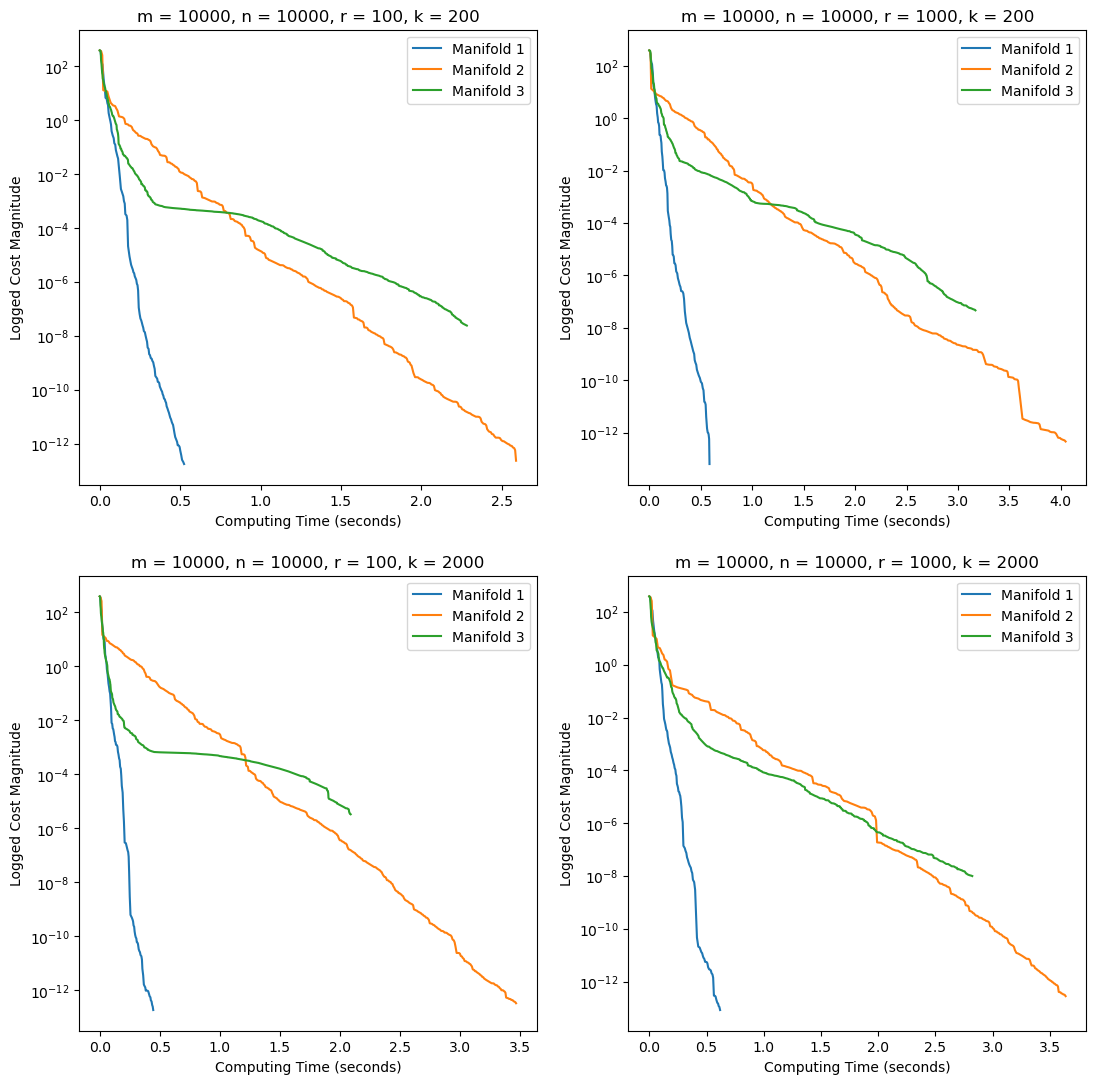

In [302]:
fig, axes = plt.subplots(2, 2, figsize = (13, 13))

gen_choices(10000, 10000, 100, 200, axes[0,0])
gen_choices(10000, 10000, 1000, 200, axes[0,1])
gen_choices(10000, 10000, 100, 2000, axes[1,0])
gen_choices(10000, 10000, 1000, 2000, axes[1,1])

fig.savefig("3.4f.png")

<Figure size 640x480 with 0 Axes>